In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

 
from sklearn.linear_model import LinearRegression
 

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [3]:
social = pd.read_csv("traincodepth.csv")
socialtest = pd.read_csv("testcodepth.csv")
socialtest.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_whatsapp_msg_characters,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters
0,0,112,139,2,25,8.19,510,70,MN,12.9,...,182.1,357-9832,84,16.35,15.21,yes,3.48,178.9,10,96.2
1,1,82,117,1,22,10.15,415,82,IN,3.7,...,225.6,355-6531,120,33.32,27.43,yes,1.00,322.7,5,196.0
2,2,87,83,1,0,5.45,408,126,UT,11.7,...,121.1,380-3561,105,46.16,18.39,no,3.16,216.3,4,271.5
3,3,73,116,3,0,7.14,415,87,CT,8.9,...,158.7,335-6832,89,41.80,20.41,no,2.40,240.1,5,NaN
4,4,128,121,2,0,11.98,415,99,AL,2.9,...,266.3,414-6541,105,28.71,10.53,no,0.78,123.9,7,168.9


In [4]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 22 columns):
uid                                 2009 non-null int64
total_facebook_statuses             2009 non-null int64
account_membership_period           2009 non-null int64
service_support_calls               2009 non-null int64
number_of_snaps                     2009 non-null int64
total_whatsapp_charge               1814 non-null float64
sub_country_code                    2009 non-null int64
total_twitter_tweets                2009 non-null int64
country                             2009 non-null object
total_email_characters              1808 non-null float64
email_plan                          2009 non-null object
total_whatsapp_msg_characters       2009 non-null float64
social_account_number               2009 non-null object
total_whatsapp_msgs                 2009 non-null int64
total_facebook_charge               2009 non-null float64
total_twitter_charge                2009 n

In [5]:
social['country'].value_counts()

WI    55
NY    52
WV    52
MN    51
WY    49
VA    47
OH    47
MD    46
MO    45
AL    45
ID    45
NJ    44
WA    44
SD    44
OR    43
TX    43
MI    43
RI    43
MT    42
NM    42
MA    41
NC    40
VT    40
FL    40
KS    40
IN    40
CO    40
CT    39
GA    38
UT    38
DE    38
AZ    38
NV    37
OK    37
DC    37
ME    35
ND    35
SC    35
LA    35
KY    34
AK    33
AR    33
NH    33
TN    32
MS    32
IL    32
PA    31
HI    30
NE    28
IA    24
CA    22
Name: country, dtype: int64

In [6]:
socialtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 21 columns):
uid                                 224 non-null int64
total_facebook_statuses             224 non-null int64
account_membership_period           224 non-null int64
service_support_calls               224 non-null int64
number_of_snaps                     224 non-null int64
total_whatsapp_charge               207 non-null float64
sub_country_code                    224 non-null int64
total_twitter_tweets                224 non-null int64
country                             224 non-null object
total_email_characters              208 non-null float64
email_plan                          224 non-null object
total_whatsapp_msg_characters       224 non-null float64
social_account_number               224 non-null object
total_whatsapp_msgs                 224 non-null int64
total_facebook_charge               224 non-null float64
total_twitter_charge                224 non-null float64
sn

In [7]:
social.drop(['social_account_number'],1,inplace=True)


In [8]:
socialtest.drop(['social_account_number'],1,inplace=True)


In [9]:
social.describe()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,total_email_characters,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,1814.000000,2009.000000,2009.000000,1808.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,1814.000000,2009.000000,1811.000000,2009.000000
mean,1004.000000,100.637631,100.611747,1.574415,7.989547,9.020138,436.801891,100.481334,10.255254,200.206670,99.970134,30.684803,17.105555,2.766272,202.076461,4.448980,180.152181,0.143853
std,580.092665,19.888186,39.882654,1.340661,13.636881,2.310479,42.187373,20.218596,2.782532,51.152663,19.679076,9.219662,4.336533,0.750236,50.890054,2.463581,54.036695,0.351028
min,0.000000,30.000000,1.000000,0.000000,0.000000,1.040000,408.000000,0.000000,0.000000,23.200000,33.000000,0.440000,0.000000,0.000000,0.000000,0.000000,2.600000,0.000000
25%,502.000000,88.000000,73.000000,1.000000,0.000000,7.460000,408.000000,87.000000,8.500000,165.700000,86.000000,24.430000,14.160000,2.300000,167.100000,3.000000,143.600000,0.000000
50%,1004.000000,101.000000,100.000000,1.000000,0.000000,9.055000,415.000000,100.000000,10.300000,200.800000,100.000000,30.480000,17.100000,2.780000,203.150000,4.000000,179.200000,0.000000
75%,1506.000000,114.000000,127.000000,2.000000,19.000000,10.590000,415.000000,114.000000,12.000000,234.500000,114.000000,36.860000,19.980000,3.240000,235.500000,6.000000,216.100000,0.000000
max,2008.000000,160.000000,232.000000,9.000000,50.000000,17.770000,510.000000,170.000000,20.000000,395.000000,175.000000,58.960000,30.910000,5.400000,363.700000,18.000000,346.800000,1.000000


In [10]:
socialtest.describe()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,total_email_characters,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters
count,224.000000,224.000000,224.000000,224.000000,224.000000,207.000000,224.000000,224.000000,208.000000,224.000000,224.000000,224.000000,224.000000,224.000000,205.000000,224.000000,207.000000
mean,111.500000,101.258929,99.616071,1.473214,8.785714,9.258696,436.245536,99.111607,10.155769,205.973214,99.040179,29.982411,16.997679,2.724330,200.784878,4.508929,177.321739
std,64.807407,21.109684,40.146647,1.193854,14.504633,2.214771,41.757333,18.100889,2.867166,49.225590,18.316676,9.623614,4.065209,0.775389,47.109209,2.346624,54.563168
min,0.000000,52.000000,1.000000,0.000000,0.000000,2.760000,408.000000,36.000000,0.000000,61.400000,44.000000,1.340000,6.400000,0.000000,75.300000,0.000000,37.800000
25%,55.750000,87.000000,74.000000,1.000000,0.000000,7.880000,415.000000,87.750000,8.275000,175.000000,86.750000,24.292500,13.967500,2.210000,170.000000,3.000000,143.850000
50%,111.500000,100.000000,99.000000,1.000000,0.000000,9.150000,415.000000,99.500000,10.100000,203.600000,98.000000,30.515000,17.120000,2.730000,201.400000,4.000000,179.700000
75%,167.250000,116.000000,127.250000,2.000000,20.250000,10.800000,415.000000,111.000000,11.925000,239.900000,110.250000,35.877500,19.662500,3.195000,230.100000,6.000000,211.100000
max,223.000000,165.000000,208.000000,7.000000,49.000000,14.540000,510.000000,151.000000,17.500000,323.000000,151.000000,55.510000,27.610000,4.730000,324.800000,14.000000,326.500000


In [11]:
socialtest['email_plan'].value_counts()

no     200
yes     24
Name: email_plan, dtype: int64

In [12]:
socialtest['snapchat_plan'].value_counts()

no     159
yes     65
Name: snapchat_plan, dtype: int64

In [13]:
social['snapchat_plan'].value_counts()

no     1462
yes     547
Name: snapchat_plan, dtype: int64

In [14]:
socialtest.shape

(224, 20)

In [15]:
social.shape

(2009, 21)

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

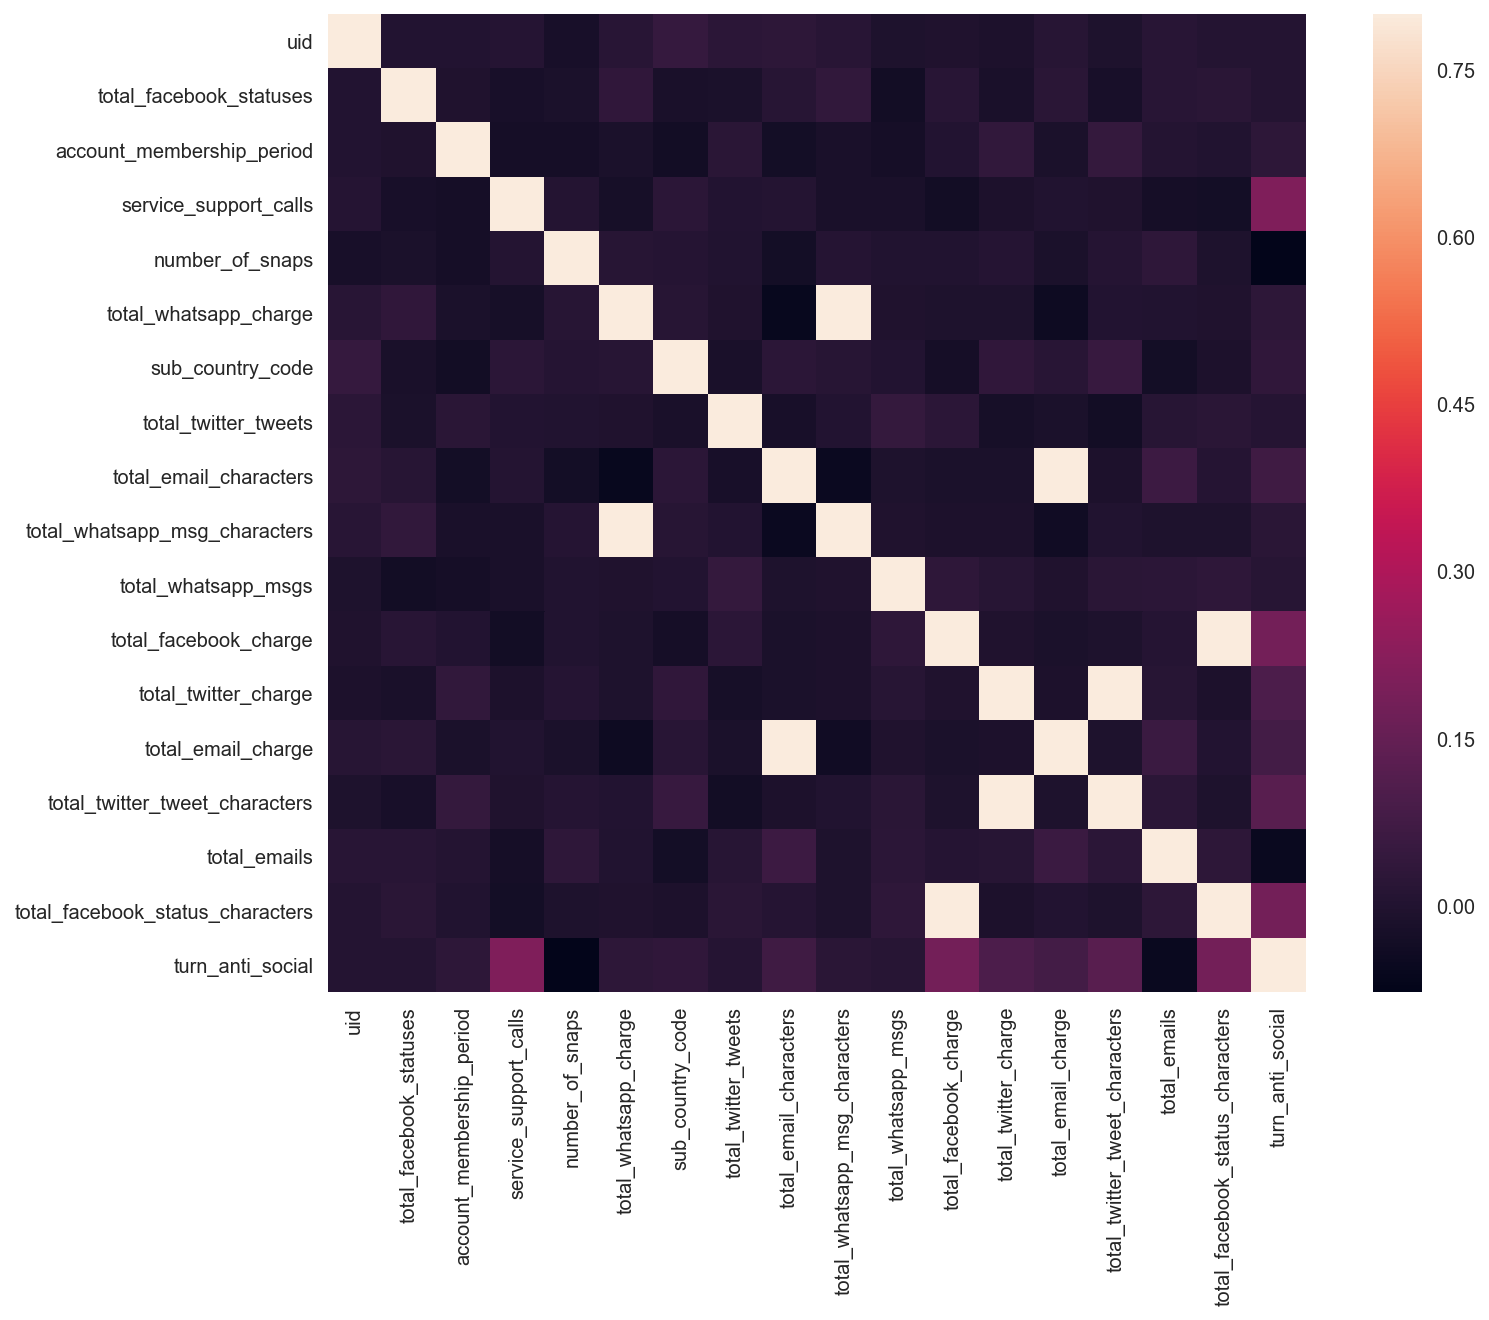

In [16]:
# Correlation Matrix Heatmap
corrmat = social.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [17]:
social.corr()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,total_email_characters,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
uid,1.000000,0.003628,0.003033,0.008987,-0.019931,0.016817,0.046295,0.023770,0.028297,0.017354,-0.007393,-0.002340,-0.010336,0.012195,-0.008892,0.015339,0.007120,0.005361
total_facebook_statuses,0.003628,1.000000,-0.002459,-0.020785,-0.015290,0.035577,-0.017197,-0.014957,0.012465,0.037883,-0.035324,0.017932,-0.017449,0.019294,-0.021867,0.016332,0.018633,0.004902
account_membership_period,0.003033,-0.002459,1.000000,-0.029264,-0.026723,-0.015330,-0.034104,0.020468,-0.029652,-0.018714,-0.027890,0.002492,0.036631,-0.015313,0.043972,0.006514,-0.001544,0.027398
service_support_calls,0.008987,-0.020785,-0.029264,1.000000,0.007384,-0.023872,0.024792,0.002453,0.005477,-0.016781,-0.018811,-0.033478,-0.010308,0.001115,-0.002657,-0.028516,-0.031927,0.206347
number_of_snaps,-0.019931,-0.015290,-0.026723,0.007384,1.000000,0.012280,0.011437,-0.001347,-0.030777,0.010211,-0.000504,-0.000416,0.009887,-0.015175,0.009350,0.030602,-0.006980,-0.077504
total_whatsapp_charge,0.016817,0.035577,-0.015330,-0.023872,0.012280,1.000000,0.012654,-0.002427,-0.057455,0.999999,-0.005341,-0.007252,-0.007886,-0.045648,0.004669,0.000221,-0.004981,0.026129
sub_country_code,0.046295,-0.017197,-0.034104,0.024792,0.011437,0.012654,1.000000,-0.016139,0.023002,0.013558,0.003308,-0.028449,0.035020,0.018136,0.050944,-0.032872,-0.009122,0.033839
total_twitter_tweets,0.023770,-0.014957,0.020468,0.002453,-0.001347,-0.002427,-0.016139,1.000000,-0.021013,0.001598,0.043086,0.023383,-0.025338,-0.014000,-0.034552,0.013156,0.019037,0.010448
total_email_characters,0.028297,0.012465,-0.029652,0.005477,-0.030777,-0.057455,0.023002,-0.021013,1.000000,-0.051699,-0.005617,-0.012386,-0.014989,0.999993,-0.011020,0.060456,0.010640,0.066688
total_whatsapp_msg_characters,0.017354,0.037883,-0.018714,-0.016781,0.010211,0.999999,0.013558,0.001598,-0.051699,1.000000,-0.002109,-0.010256,-0.011142,-0.039262,0.000706,-0.007743,-0.008668,0.021899


In [18]:
print(social.isnull().sum())

uid                                   0
total_facebook_statuses               0
account_membership_period             0
service_support_calls                 0
number_of_snaps                       0
total_whatsapp_charge               195
sub_country_code                      0
total_twitter_tweets                  0
country                               0
total_email_characters              201
email_plan                            0
total_whatsapp_msg_characters         0
total_whatsapp_msgs                   0
total_facebook_charge                 0
total_twitter_charge                  0
snapchat_plan                         0
total_email_charge                    0
total_twitter_tweet_characters      195
total_emails                          0
total_facebook_status_characters    198
turn_anti_social                      0
dtype: int64


In [19]:
print(socialtest.isnull().sum())

uid                                  0
total_facebook_statuses              0
account_membership_period            0
service_support_calls                0
number_of_snaps                      0
total_whatsapp_charge               17
sub_country_code                     0
total_twitter_tweets                 0
country                              0
total_email_characters              16
email_plan                           0
total_whatsapp_msg_characters        0
total_whatsapp_msgs                  0
total_facebook_charge                0
total_twitter_charge                 0
snapchat_plan                        0
total_email_charge                   0
total_twitter_tweet_characters      19
total_emails                         0
total_facebook_status_characters    17
dtype: int64


In [20]:
social.convert_objects(convert_numeric=True)

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,110,80,1,15,6.35,408,120,MO,11.9,...,141.2,82,27.08,14.50,yes,3.21,170.6,5,159.3,0
1,1,103,66,2,0,8.88,415,77,OH,10.5,...,197.3,138,28.99,21.62,no,2.84,254.3,2,170.5,0
2,2,92,49,2,0,7.55,415,119,SC,15.6,...,167.8,86,40.43,17.76,no,4.21,208.9,6,NaN,1
3,3,125,103,3,0,9.93,510,113,SD,12.2,...,220.6,95,35.11,15.32,no,3.29,180.2,4,206.5,0
4,4,106,194,0,0,10.13,510,150,GA,NaN,...,225.2,122,32.86,14.37,no,3.19,169.0,4,193.3,0
5,5,112,110,2,0,6.30,408,93,OR,11.7,...,140.0,119,25.47,15.30,no,3.16,NaN,4,149.8,0
6,6,123,124,1,0,11.49,408,104,NV,5.3,...,255.4,93,25.69,15.93,no,1.43,187.4,3,NaN,0
7,7,107,91,0,37,12.48,510,115,NE,9.2,...,277.4,94,27.59,19.88,yes,2.48,233.9,4,162.3,0
8,8,95,166,0,0,8.91,408,105,MN,9.8,...,198.0,126,25.86,10.29,no,2.65,121.0,5,152.1,0
9,9,108,172,3,0,6.89,408,125,MD,14.4,...,153.2,98,48.81,15.16,no,3.89,178.4,2,287.1,1


In [21]:
social.convert_objects(convert_numeric=True)

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,110,80,1,15,6.35,408,120,MO,11.9,...,141.2,82,27.08,14.50,yes,3.21,170.6,5,159.3,0
1,1,103,66,2,0,8.88,415,77,OH,10.5,...,197.3,138,28.99,21.62,no,2.84,254.3,2,170.5,0
2,2,92,49,2,0,7.55,415,119,SC,15.6,...,167.8,86,40.43,17.76,no,4.21,208.9,6,NaN,1
3,3,125,103,3,0,9.93,510,113,SD,12.2,...,220.6,95,35.11,15.32,no,3.29,180.2,4,206.5,0
4,4,106,194,0,0,10.13,510,150,GA,NaN,...,225.2,122,32.86,14.37,no,3.19,169.0,4,193.3,0
5,5,112,110,2,0,6.30,408,93,OR,11.7,...,140.0,119,25.47,15.30,no,3.16,NaN,4,149.8,0
6,6,123,124,1,0,11.49,408,104,NV,5.3,...,255.4,93,25.69,15.93,no,1.43,187.4,3,NaN,0
7,7,107,91,0,37,12.48,510,115,NE,9.2,...,277.4,94,27.59,19.88,yes,2.48,233.9,4,162.3,0
8,8,95,166,0,0,8.91,408,105,MN,9.8,...,198.0,126,25.86,10.29,no,2.65,121.0,5,152.1,0
9,9,108,172,3,0,6.89,408,125,MD,14.4,...,153.2,98,48.81,15.16,no,3.89,178.4,2,287.1,1


In [22]:
mean_value=social['total_whatsapp_charge'].mean()
social['total_whatsapp_charge']=social['total_whatsapp_charge'].fillna(mean_value)

In [23]:
mean_value=socialtest['total_whatsapp_charge'].mean()
socialtest['total_whatsapp_charge']=socialtest['total_whatsapp_charge'].fillna(mean_value)

In [24]:
mean_value=social['total_email_characters'].mean()
social['total_email_characters']=social['total_email_characters'].fillna(mean_value)

In [25]:
mean_value=socialtest['total_email_characters'].mean()
socialtest['total_email_characters']=socialtest['total_email_characters'].fillna(mean_value)

In [26]:
mean_value=social['total_twitter_tweet_characters'].mean()
social['total_twitter_tweet_characters']=social['total_twitter_tweet_characters'].fillna(mean_value)

In [27]:
mean_value=socialtest['total_twitter_tweet_characters'].mean()
socialtest['total_twitter_tweet_characters']=socialtest['total_twitter_tweet_characters'].fillna(mean_value)

In [28]:
mean_value=social['total_facebook_status_characters'].mean()
social['total_facebook_status_characters']=social['total_facebook_status_characters'].fillna(mean_value)

In [29]:
mean_value=socialtest['total_facebook_status_characters'].mean()
socialtest['total_facebook_status_characters']=socialtest['total_facebook_status_characters'].fillna(mean_value)

In [30]:
print(social.isnull().sum())

uid                                 0
total_facebook_statuses             0
account_membership_period           0
service_support_calls               0
number_of_snaps                     0
total_whatsapp_charge               0
sub_country_code                    0
total_twitter_tweets                0
country                             0
total_email_characters              0
email_plan                          0
total_whatsapp_msg_characters       0
total_whatsapp_msgs                 0
total_facebook_charge               0
total_twitter_charge                0
snapchat_plan                       0
total_email_charge                  0
total_twitter_tweet_characters      0
total_emails                        0
total_facebook_status_characters    0
turn_anti_social                    0
dtype: int64


In [31]:
print(socialtest.isnull().sum())

uid                                 0
total_facebook_statuses             0
account_membership_period           0
service_support_calls               0
number_of_snaps                     0
total_whatsapp_charge               0
sub_country_code                    0
total_twitter_tweets                0
country                             0
total_email_characters              0
email_plan                          0
total_whatsapp_msg_characters       0
total_whatsapp_msgs                 0
total_facebook_charge               0
total_twitter_charge                0
snapchat_plan                       0
total_email_charge                  0
total_twitter_tweet_characters      0
total_emails                        0
total_facebook_status_characters    0
dtype: int64


In [32]:
social['total_whatsapp_charge'].value_counts()

9.020138     195
8.880000      11
9.660000       9
9.180000       8
9.640000       8
9.450000       8
10.350000      8
9.230000       7
8.470000       7
7.150000       7
8.640000       7
10.290000      7
11.070000      7
7.570000       7
10.060000      6
9.650000       6
7.460000       6
7.730000       6
9.970000       6
6.930000       6
8.210000       6
10.280000      6
8.150000       6
11.510000      6
10.490000      6
8.590000       6
10.800000      6
8.200000       6
8.660000       6
8.730000       6
            ... 
17.770000      1
13.820000      1
3.320000       1
4.970000       1
4.700000       1
8.890000       1
5.940000       1
4.610000       1
15.710000      1
11.840000      1
6.810000       1
8.300000       1
9.240000       1
12.450000      1
2.890000       1
6.340000       1
4.730000       1
15.850000      1
11.420000      1
13.180000      1
2.430000       1
13.470000      1
13.840000      1
8.270000       1
11.010000      1
3.440000       1
14.650000      1
4.410000      

In [33]:
social['total_twitter_tweet_characters'].value_counts()

202.076461    195
169.900000      7
211.500000      6
201.000000      5
215.600000      5
188.800000      5
193.800000      5
167.200000      5
186.400000      5
164.500000      5
214.800000      5
187.400000      4
220.100000      4
187.200000      4
161.700000      4
256.800000      4
153.100000      4
225.100000      4
199.200000      4
224.900000      4
144.300000      4
243.200000      4
262.000000      4
205.100000      4
189.700000      4
213.700000      4
253.600000      4
167.700000      4
203.800000      4
195.700000      4
             ... 
229.000000      1
254.000000      1
125.800000      1
203.700000      1
250.300000      1
192.900000      1
233.900000      1
113.400000      1
213.100000      1
267.400000      1
244.300000      1
143.300000      1
163.700000      1
191.300000      1
147.800000      1
128.700000      1
140.900000      1
61.900000       1
153.700000      1
215.400000      1
238.700000      1
241.300000      1
128.900000      1
242.600000      1
160.400000

In [34]:
social['total_facebook_status_characters'].value_counts()

180.152181    198
159.500000      7
183.400000      6
142.300000      6
160.000000      5
177.100000      5
162.300000      5
167.800000      5
146.300000      5
222.800000      5
189.300000      5
174.500000      5
178.700000      5
175.800000      5
225.200000      4
183.600000      4
137.800000      4
179.400000      4
179.200000      4
209.400000      4
112.800000      4
170.500000      4
224.700000      4
203.400000      4
171.200000      4
230.900000      4
181.500000      4
194.800000      4
184.500000      4
193.800000      4
             ... 
256.500000      1
78.200000       1
267.900000      1
105.300000      1
145.100000      1
135.400000      1
199.800000      1
191.600000      1
226.400000      1
299.400000      1
202.700000      1
93.800000       1
123.200000      1
187.100000      1
250.800000      1
193.400000      1
248.700000      1
177.700000      1
2.600000        1
169.600000      1
190.700000      1
215.700000      1
137.300000      1
151.800000      1
281.400000

In [35]:
social_onehot = social.copy()
social_onehot = pd.get_dummies(social_onehot, columns=['email_plan'], prefix = ['email'])

print(social_onehot.head())

   uid  total_facebook_statuses  account_membership_period  \
0    0                      110                         80   
1    1                      103                         66   
2    2                       92                         49   
3    3                      125                        103   
4    4                      106                        194   

   service_support_calls  number_of_snaps  total_whatsapp_charge  \
0                      1               15                   6.35   
1                      2                0                   8.88   
2                      2                0                   7.55   
3                      3                0                   9.93   
4                      0                0                  10.13   

   sub_country_code  total_twitter_tweets country  total_email_characters  \
0               408                   120      MO               11.900000   
1               415                    77      OH               

In [36]:
socialtest_onehot = socialtest.copy()
socialtest_onehot = pd.get_dummies(socialtest_onehot, columns=['email_plan'], prefix = ['email'])

print(socialtest_onehot.head())

   uid  total_facebook_statuses  account_membership_period  \
0    0                      112                        139   
1    1                       82                        117   
2    2                       87                         83   
3    3                       73                        116   
4    4                      128                        121   

   service_support_calls  number_of_snaps  total_whatsapp_charge  \
0                      2               25                   8.19   
1                      1               22                  10.15   
2                      1                0                   5.45   
3                      3                0                   7.14   
4                      2                0                  11.98   

   sub_country_code  total_twitter_tweets country  total_email_characters  \
0               510                    70      MN                    12.9   
1               415                    82      IN               

In [37]:
social_onehot.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social,email_no,email_yes
0,0,110,80,1,15,6.35,408,120,MO,11.900000,...,27.08,14.50,yes,3.21,170.6,5,159.300000,0,0,1
1,1,103,66,2,0,8.88,415,77,OH,10.500000,...,28.99,21.62,no,2.84,254.3,2,170.500000,0,1,0
2,2,92,49,2,0,7.55,415,119,SC,15.600000,...,40.43,17.76,no,4.21,208.9,6,180.152181,1,0,1
3,3,125,103,3,0,9.93,510,113,SD,12.200000,...,35.11,15.32,no,3.29,180.2,4,206.500000,0,1,0
4,4,106,194,0,0,10.13,510,150,GA,10.255254,...,32.86,14.37,no,3.19,169.0,4,193.300000,0,1,0


In [38]:
social_onehot = social_onehot.copy()
social_onehot = pd.get_dummies(social_onehot, columns=['snapchat_plan'], prefix = ['snap'])

print(social_onehot.head())

   uid  total_facebook_statuses  account_membership_period  \
0    0                      110                         80   
1    1                      103                         66   
2    2                       92                         49   
3    3                      125                        103   
4    4                      106                        194   

   service_support_calls  number_of_snaps  total_whatsapp_charge  \
0                      1               15                   6.35   
1                      2                0                   8.88   
2                      2                0                   7.55   
3                      3                0                   9.93   
4                      0                0                  10.13   

   sub_country_code  total_twitter_tweets country  total_email_characters  \
0               408                   120      MO               11.900000   
1               415                    77      OH               

In [39]:
socialtest_onehot = socialtest_onehot.copy()
socialtest_onehot = pd.get_dummies(socialtest_onehot, columns=['snapchat_plan'], prefix = ['snap'])

print(socialtest_onehot.head())

   uid  total_facebook_statuses  account_membership_period  \
0    0                      112                        139   
1    1                       82                        117   
2    2                       87                         83   
3    3                       73                        116   
4    4                      128                        121   

   service_support_calls  number_of_snaps  total_whatsapp_charge  \
0                      2               25                   8.19   
1                      1               22                  10.15   
2                      1                0                   5.45   
3                      3                0                   7.14   
4                      2                0                  11.98   

   sub_country_code  total_twitter_tweets country  total_email_characters  \
0               510                    70      MN                    12.9   
1               415                    82      IN               

In [40]:
social_onehot.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social,email_no,email_yes,snap_no,snap_yes
0,0,110,80,1,15,6.35,408,120,MO,11.900000,...,14.50,3.21,170.6,5,159.300000,0,0,1,0,1
1,1,103,66,2,0,8.88,415,77,OH,10.500000,...,21.62,2.84,254.3,2,170.500000,0,1,0,1,0
2,2,92,49,2,0,7.55,415,119,SC,15.600000,...,17.76,4.21,208.9,6,180.152181,1,0,1,1,0
3,3,125,103,3,0,9.93,510,113,SD,12.200000,...,15.32,3.29,180.2,4,206.500000,0,1,0,1,0
4,4,106,194,0,0,10.13,510,150,GA,10.255254,...,14.37,3.19,169.0,4,193.300000,0,1,0,1,0


In [41]:
social_onehot.columns

Index(['uid', 'total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'sub_country_code', 'total_twitter_tweets', 'country',
       'total_email_characters', 'total_whatsapp_msg_characters',
       'total_whatsapp_msgs', 'total_facebook_charge', 'total_twitter_charge',
       'total_email_charge', 'total_twitter_tweet_characters', 'total_emails',
       'total_facebook_status_characters', 'turn_anti_social', 'email_no',
       'email_yes', 'snap_no', 'snap_yes'],
      dtype='object')

In [42]:
socialtest_onehot.columns

Index(['uid', 'total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'sub_country_code', 'total_twitter_tweets', 'country',
       'total_email_characters', 'total_whatsapp_msg_characters',
       'total_whatsapp_msgs', 'total_facebook_charge', 'total_twitter_charge',
       'total_email_charge', 'total_twitter_tweet_characters', 'total_emails',
       'total_facebook_status_characters', 'email_no', 'email_yes', 'snap_no',
       'snap_yes'],
      dtype='object')

In [43]:
import category_encoders as ce

In [44]:
encoder = ce.BackwardDifferenceEncoder(cols=['country'])
social1 = encoder.fit_transform(social_onehot)

social1.head()

,intercept,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country_0,...,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social,email_no,email_yes,snap_no,snap_yes
0,1,0,110,80,1,15,6.35,408,120,-0.980392,...,14.50,3.21,170.6,5,159.300000,0,0,1,0,1
1,1,1,103,66,2,0,8.88,415,77,0.019608,...,21.62,2.84,254.3,2,170.500000,0,1,0,1,0
2,1,2,92,49,2,0,7.55,415,119,0.019608,...,17.76,4.21,208.9,6,180.152181,1,0,1,1,0
3,1,3,125,103,3,0,9.93,510,113,0.019608,...,15.32,3.29,180.2,4,206.500000,0,1,0,1,0
4,1,4,106,194,0,0,10.13,510,150,0.019608,...,14.37,3.19,169.0,4,193.300000,0,1,0,1,0


In [45]:
social1.describe()

,intercept,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country_0,...,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social,email_no,email_yes,snap_no,snap_yes
count,2009.0,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,...,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,1.0,1004.000000,100.637631,100.611747,1.574415,7.989547,9.020138,436.801891,100.481334,-0.002791,...,17.105555,2.766272,202.076461,4.448980,180.152181,0.143853,0.906421,0.093579,0.727725,0.272275
std,0.0,580.092665,19.888186,39.882654,1.340661,13.636881,2.195427,42.187373,20.218596,0.148015,...,4.336533,0.750236,48.355955,2.463581,51.303407,0.351028,0.291314,0.291314,0.445241,0.445241
min,1.0,0.000000,30.000000,1.000000,0.000000,0.000000,1.040000,408.000000,0.000000,-0.980392,...,0.000000,0.000000,0.000000,0.000000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,502.000000,88.000000,73.000000,1.000000,0.000000,7.620000,408.000000,87.000000,0.019608,...,14.160000,2.300000,169.600000,3.000000,147.100000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.0,1004.000000,101.000000,100.000000,1.000000,0.000000,9.020138,415.000000,100.000000,0.019608,...,17.100000,2.780000,202.076461,4.000000,180.152181,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.0,1506.000000,114.000000,127.000000,2.000000,19.000000,10.350000,415.000000,114.000000,0.019608,...,19.980000,3.240000,230.900000,6.000000,211.300000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.0,2008.000000,160.000000,232.000000,9.000000,50.000000,17.770000,510.000000,170.000000,0.019608,...,30.910000,5.400000,363.700000,18.000000,346.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
encoder = ce.BackwardDifferenceEncoder(cols=['country'])
socialtest1 = encoder.fit_transform(socialtest_onehot)

socialtest1.head()

,intercept,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country_0,...,total_facebook_charge,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,email_no,email_yes,snap_no,snap_yes
0,1,0,112,139,2,25,8.19,510,70,-0.980392,...,16.35,15.21,3.48,178.9,10,96.200000,1,0,0,1
1,1,1,82,117,1,22,10.15,415,82,0.019608,...,33.32,27.43,1.00,322.7,5,196.000000,0,1,0,1
2,1,2,87,83,1,0,5.45,408,126,0.019608,...,46.16,18.39,3.16,216.3,4,271.500000,0,1,1,0
3,1,3,73,116,3,0,7.14,415,87,0.019608,...,41.80,20.41,2.40,240.1,5,177.321739,1,0,1,0
4,1,4,128,121,2,0,11.98,415,99,0.019608,...,28.71,10.53,0.78,123.9,7,168.900000,1,0,1,0


In [47]:
label = social1['turn_anti_social']

label.head()

0    0
1    0
2    1
3    0
4    0
Name: turn_anti_social, dtype: int64

In [48]:
len(label)

2009

In [71]:
social2 = social1.drop("turn_anti_social", axis=1)


In [73]:
socialtest1['uid']

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
      ... 
194    194
195    195
196    196
197    197
198    198
199    199
200    200
201    201
202    202
203    203
204    204
205    205
206    206
207    207
208    208
209    209
210    210
211    211
212    212
213    213
214    214
215    215
216    216
217    217
218    218
219    219
220    220
221    221
222    222
223    223
Name: uid, Length: 224, dtype: int64

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(social2, label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
#some_data = social2.iloc[:5]
#some_labels = label.iloc[:5]

p = []
for i in lin_reg.predict(social2):
    if i>=0.5:
        p.append(1)
    else:
        p.append(0)


In [61]:
print("The accuracy on training set is :")
c=0
for i,j in zip(p,label):
    if(i==j):
        c=c+1;
        
        

print(float(c/len(p))*100)

The accuracy on training set is :
86.66002986560478


In [62]:
p1 = []
for i in lin_reg.predict(socialtest1):
    if i>=0.5:
        p1.append(1)
    else:
        p1.append(0)



In [63]:
valid=pd.read_csv('expectedoutput.csv')

In [64]:
valid1=valid['turn_anti_social']

In [65]:
len(valid1)

224

In [66]:
print("The accuracy on test set is :")
c=0
for i,j in zip(p1,valid1):
    if(i==j):
        c=c+1;
        
        

print(float(c/len(p1))*100)
        

The accuracy on test set is :
85.26785714285714


In [74]:
from pandas import DataFrame

abc = { 'uid' : socialtest1['uid'],
    'anti-social': p1
      }

df = DataFrame(abc, columns= ['uid','anti-social'])

In [75]:
export_csv = df.to_csv (r'C:\Users\KIIT\outputtestset.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [219]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(social2)
lin_mse = mean_squared_error(label, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3131839951386078

In [220]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(label, predictions)
lin_mae

0.21701404114894646

In [221]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(social2, label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [222]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, social2, label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [223]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.42320737 0.32322997 0.31544015 0.27317918 0.30745303 0.31544015
 0.35267281 0.28213825 0.27317918 0.46904158]
Mean: 0.33349816559123413
Standard deviation: 0.06175596665852257


In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(social2, label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [225]:
p1 = forest_reg.predict(socialtest1)


In [226]:
c=0
for i,j in zip(p1,valid1):
    if(i==j):
        c=c+1;
        
        

print(float(c/len(p1)))
        

0.5714285714285714


In [227]:
predictions = forest_reg.predict(socialtest1)
forest_mse = mean_squared_error(valid1, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.23960533025313582

In [72]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, social2, label,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.29218681 0.2236068  0.21347632 0.20947696 0.21113293 0.26868021
 0.25597341 0.17577122 0.23846524 0.2670206 ]
Mean: 0.23557905073848887
Standard deviation: 0.033467492320268265


In [73]:
scores = cross_val_score(lin_reg, social2, label, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.323257
std       0.026981
min       0.276936
25%       0.304705
50%       0.325548
75%       0.343651
max       0.356639
dtype: float64